
# Diseño de software para cómputo científico

----

## Unidad 2: Depuración de código

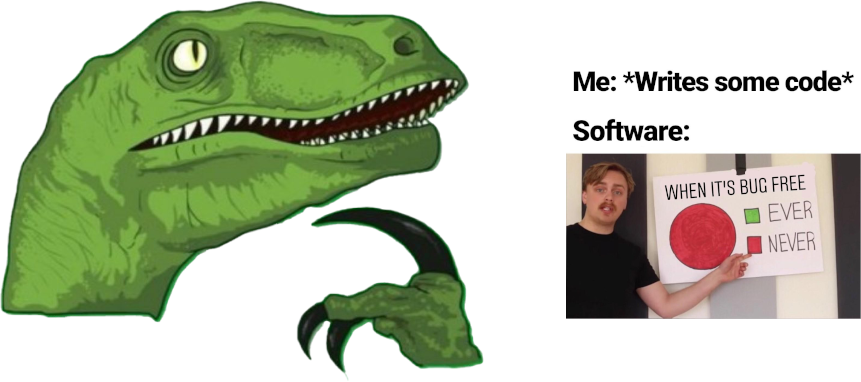


## Depuración

La depuración de programas es el proceso de identificar y corregir errores de programación. En inglés se conoce como debugging, porque se asemeja a la eliminación de bichos (bugs), manera en que se conoce informalmente a los errores de programación.

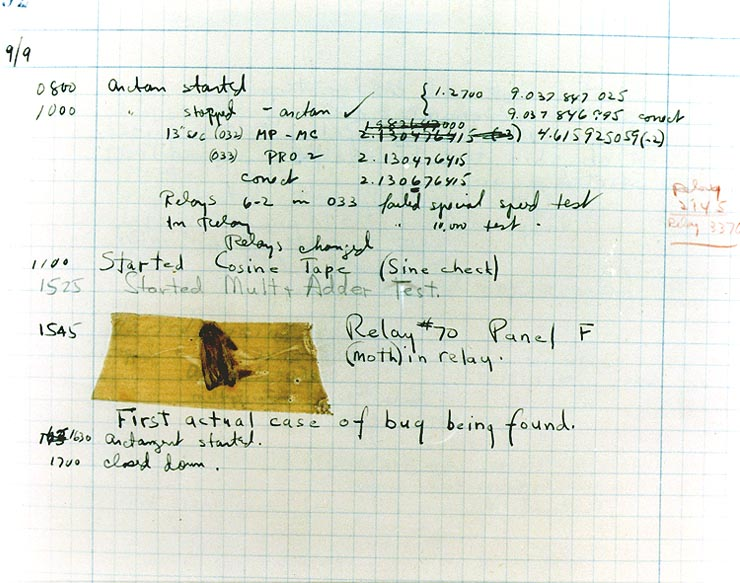

## Dos depuradores principales en Python

- Lo que vamos a ver es **Interactive debugging**
- ``pdb`` (Python debugger) viene con python y es bastante tosco.
- ``ipdb`` (IPython debugger) hay que instalarlo y es ultra cómodo. Depende de ipython/jupyter
- En pytest siempre ejecutar con `-s`.

In [1]:
!pip install ipdb

## IPDB 
Para poner un break point hay que poner 

```python 
import ipdb; ipdb.set_trace()

```

In [2]:
# code/example_ipdb.py

def fact(num):
    import ipdb; ipdb.set_trace()
    if num <= 1:
        return 1
    return num * fact(num - 1)

fact(5)

> /tmp/ipykernel_56582/1277310741.py(5)fact()
      4     import ipdb; ipdb.set_trace()
----> 5     if num <= 1:
      6         return 1

ipdb> q


BdbQuit: 

## IPDB

- pdb/ipdb son una consola interactiva de inspeccion de entorno.
- o en cristiano: Te permite ver que cuerno valen tus variables en un momento dado.
- Con `help` pueden ver que comandos hay disponible

```ipdb> help

Documented commands (type help <topic>):
========================================
EOF    clear      exit      list      pfile    restart      step       w     
a      commands   h         ll        pinfo    return       tbreak     whatis
alias  condition  help      longlist  pinfo2   retval       u          where 
args   d          ignore    n         pp       run          unalias  
b      disable    interact  next      psource  rv           undisplay
break  display    j         p         q        s            unt      
bt     down       jump      pdef      quit     skip_hidden  until    
cl     enable     l         pdoc      r        source       up       


Undocumented commands:
======================
c  cont  continue  debug
```

## IPDB 

O si quieren que se active en las exceptions usar

In [4]:
# code/example_ipdb_exception.py

def div(a, b):
    return a / b


import ipdb
with launch_ipdb_on_exception():
    div(1, 2)


In [5]:
with launch_ipdb_on_exception():
    div(1, 0)

ZeroDivisionError('division by zero')


> <ipython-input-4-0a322d294058>(5)div()
      4 def div(a, b):
----> 5     return a / b
      6 

ipdb> continue


## Nuevo comando `breakpoint()`

- `breakpoint()` es un alias que funciona en Python >= 3.7 y es equivalente a hacer 
`import pdb; pdb.set_trace()`
- Como no van a querer usar pdb despues de usar ipdb, puede configurarse desde bash para que utilice ipdb.
- Yo lo tengo en `.bashrc` para que cada terminal que abra tenga todo bien cofigurado.

```bash
export PYTHONBREAKPOINT=ipdb.set_trace
```

In [7]:
def fact(num):
    breakpoint()
    if num <= 1:
        return 1
    return num * fact(num - 1)

fact(5)

> <ipython-input-7-7d134350dd15>(5)fact()
      4     breakpoint()
----> 5     if num <= 1:
      6         return 1

ipdb> quit()


BdbQuit: 

## Debugging con pytest

Es normal que ustedes quieran debugear cuando un test falla

```bash
$ pytest code/test_div.py --pdb
```

In [10]:
# 05_debug_code/test_div.py

def div(a, b):
    return a / b


def test_division():
    div(1, 0)

- Puede lanzarse recien al 3er error (útil cuando tenes que ignorar algun error que no te interesa)

```bash
$ pytest --pdb --maxfail=3  # drop to PDB for first three failures
```

## Debugging con pytest

Si se quiere usar ipdb

```bash
$ pytest code/test_div.py --pdb --pdbcls=IPython.core.debugger:Pdb -s
```

**Si ponen un `breakpoint()` adentro de su test necesitan ejecutar pytest con `-s`**